# Gaussian Window

$$
w[n] = e^{-0.5 \big(\frac{n - M}{\sigma M}\big)^2} \bigg| M = \frac{N - \mathrm{1}_{symmetric}}{2}
$$

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.signal as dsp
import scipy.fftpack as fft
import IPython.display as display
from zplot import zplot
from compare import compare

In [2]:
def dsp_gaussian(*args, **kwargs):
    return dsp.gaussian(*args, 1.0, **kwargs)

In [3]:
def gaussian(N, sym=False, std=0.25):
    """
    Return a Lanczos window.

    Args:
        N: Number of points in the output window. 
        If zero or less, an empty array is returned.
        sym: When True (default), generates a symmetric window, 
        for use in filter design. When False, generates a 
        periodic window, for use in spectral analysis.

    Returns:
        the Lanczos window of length N with given symmetry

    """
    n = np.arange(N)
    N = (N - 1 if sym else N) / 2
    return np.exp(-0.5 * ((n - N)/(std * N))**2)

## Asymmetric

### Odd

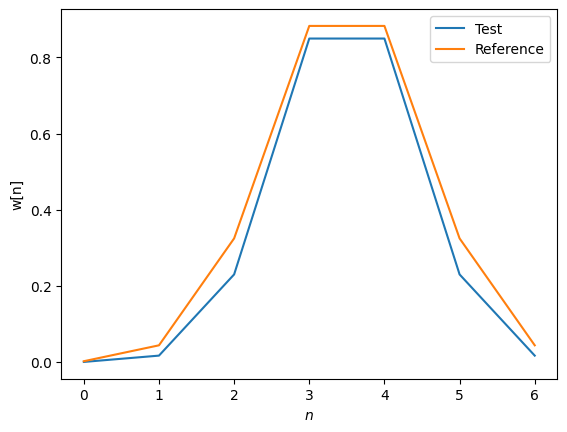

In [4]:
test, reference = compare(7, gaussian, dsp_gaussian, False)

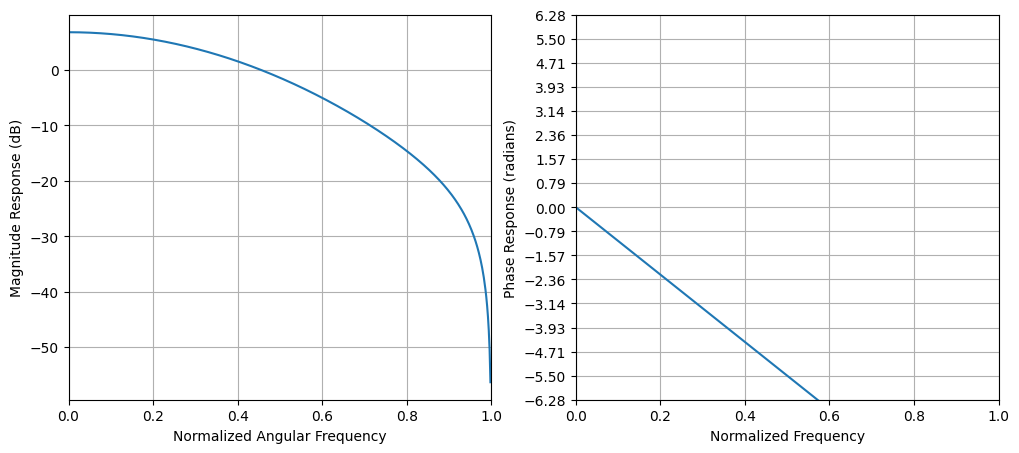

In [5]:
_ = dsp.freqz(test, plot=zplot)

In [6]:
list(test)

[0.00033546262790251185,
 0.01687988414878991,
 0.23006629899380912,
 0.8493658165683124,
 0.8493658165683124,
 0.23006629899380912,
 0.01687988414878991]

In [7]:
list(reference)

[0.002187491118182885,
 0.04393693362340742,
 0.32465246735834974,
 0.8824969025845955,
 0.8824969025845955,
 0.32465246735834974,
 0.04393693362340742]

### Even

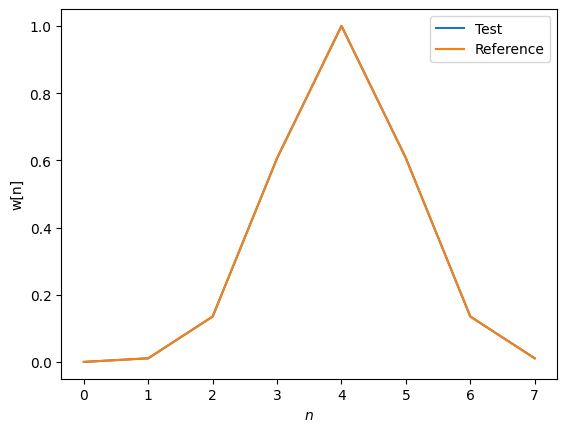

In [8]:
test, reference = compare(8, gaussian, dsp_gaussian, False)

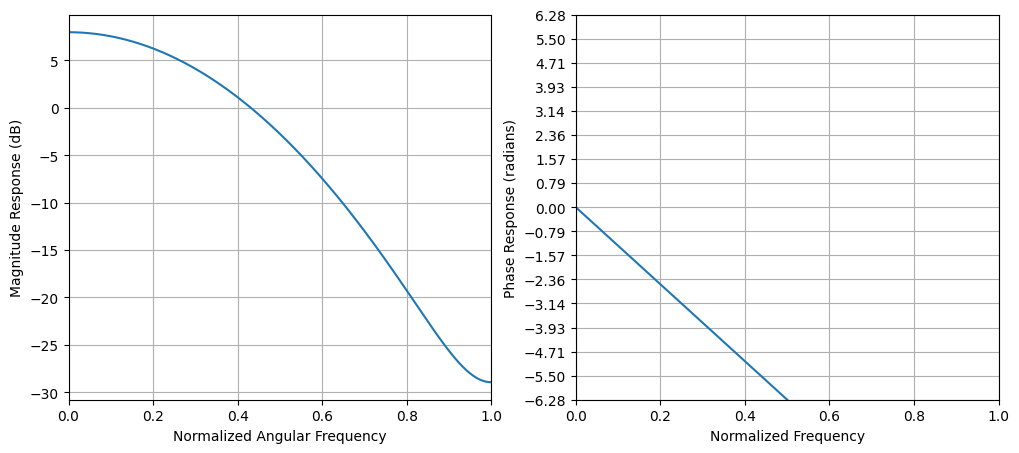

In [9]:
_ = dsp.freqz(test, plot=zplot)

In [10]:
list(test)

[0.00033546262790251185,
 0.011108996538242306,
 0.1353352832366127,
 0.6065306597126334,
 1.0,
 0.6065306597126334,
 0.1353352832366127,
 0.011108996538242306]

In [11]:
list(reference)

[0.00033546262790251185,
 0.011108996538242306,
 0.1353352832366127,
 0.6065306597126334,
 1.0,
 0.6065306597126334,
 0.1353352832366127,
 0.011108996538242306]

## Symmetric

### Odd

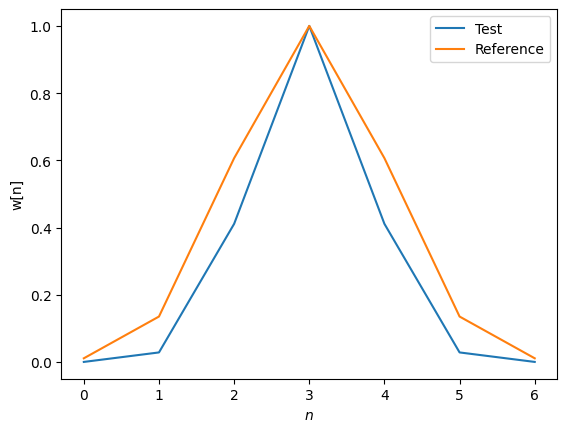

In [12]:
test, reference = compare(7, gaussian, dsp_gaussian, True)

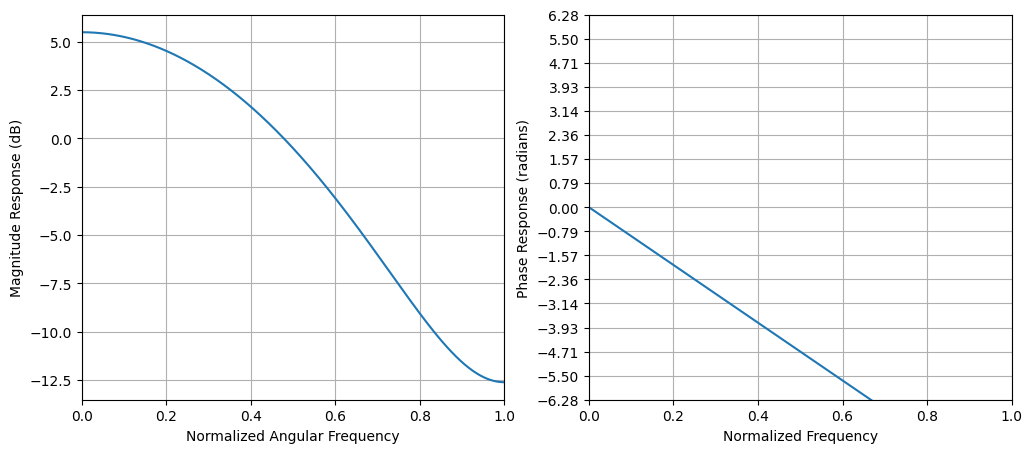

In [13]:
_ = dsp.freqz(test, plot=zplot)

In [14]:
list(test)

[0.00033546262790251185,
 0.028565500784550377,
 0.41111229050718745,
 1.0,
 0.41111229050718745,
 0.028565500784550377,
 0.00033546262790251185]

In [15]:
list(reference)

[0.011108996538242306,
 0.1353352832366127,
 0.6065306597126334,
 1.0,
 0.6065306597126334,
 0.1353352832366127,
 0.011108996538242306]

### Even

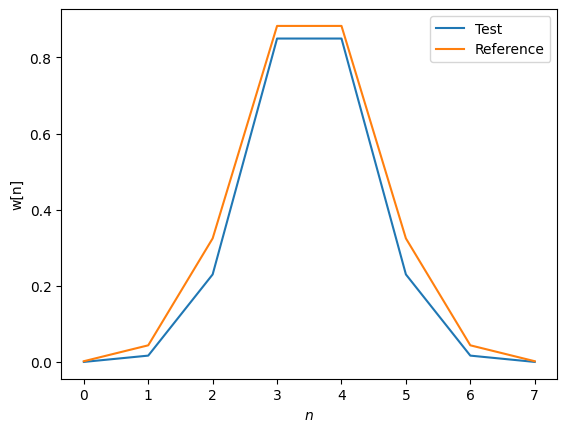

In [16]:
test, reference = compare(8, gaussian, dsp_gaussian, True)

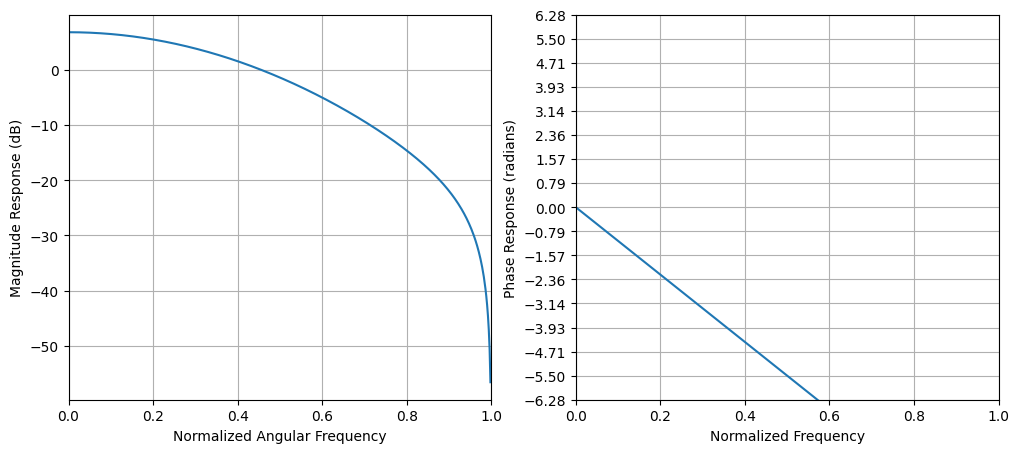

In [17]:
_ = dsp.freqz(test, plot=zplot)

In [18]:
list(test)

[0.00033546262790251185,
 0.01687988414878991,
 0.23006629899380912,
 0.8493658165683124,
 0.8493658165683124,
 0.23006629899380912,
 0.01687988414878991,
 0.00033546262790251185]

In [19]:
list(reference)

[0.002187491118182885,
 0.04393693362340742,
 0.32465246735834974,
 0.8824969025845955,
 0.8824969025845955,
 0.32465246735834974,
 0.04393693362340742,
 0.002187491118182885]

## Coherent gain

In [20]:
gaussian(1024, False, 0.3).mean()

0.3756715791109929

In [21]:
gaussian(1024, False, 0.5).mean()

0.5981438345736363

In [22]:
gaussian(1024, False, 0.7).mean()

0.7429779028555938

## Side-lobe amplitude

(-44.69507303909196, 1.0)

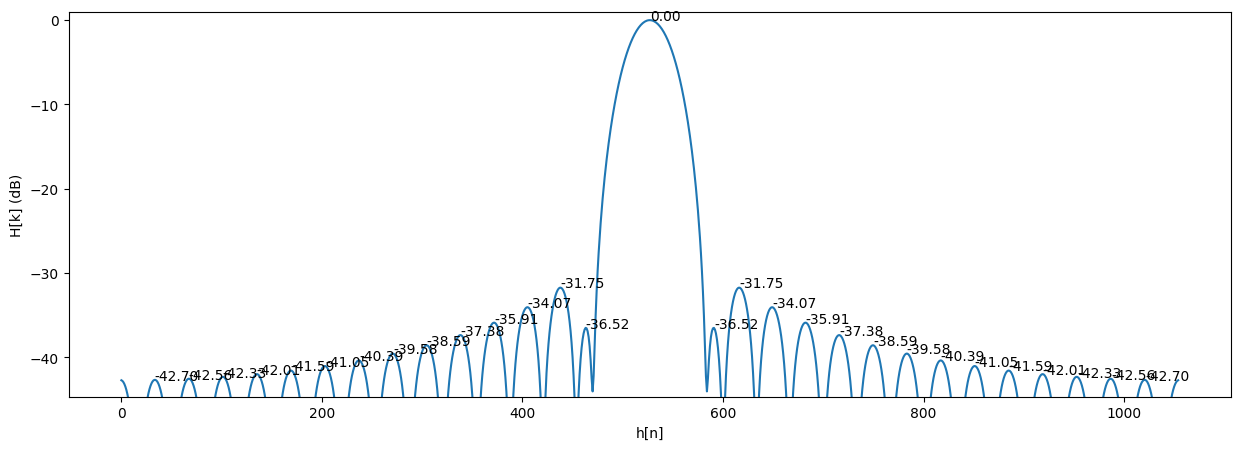

In [23]:
w = gaussian(31, False, 0.5)
w = np.pad(w, (512, 512))
H = fft.fft(w)
H = fft.fftshift(H)
H = 20 * np.log10(np.abs(H) + 1e-12)
H = H - H.max()
peaks, _ = dsp.find_peaks(H)
ymin = H[peaks[len(peaks)//2:]][-1] - 1
plt.figure(figsize=(15, 5))
plt.plot(H)
for x, y in zip(peaks, H[peaks]):
    if y > ymin:
        plt.text(x, y, f'{y:.2f}')
plt.ylabel('H[k] (dB)')
plt.xlabel('h[n]')
plt.ylim(ymin - 1, 1)
# sorted(H[peaks], reverse=True)[1]